In [25]:
import pandas as pd
import numpy as np

In [26]:
df=pd.read_csv('word2vec_embedded.csv')

In [27]:
df.head()

,label,word_count,num_stop_words,num_chars,num_punctuation_chars,word_count_after_preprocessing,num_chars_after_preprocessing,word2vec_embedded_vector
0,ham,20,4,111,9,16,82,"[-0.44536713, -0.101509035, -1.050856, -0.2630..."
1,ham,6,0,29,6,6,23,"[-0.33632967, -0.17212276, -0.87967306, -0.000..."
2,spam,28,5,155,5,20,110,"[-0.23400958, -0.0057888003, -0.75428146, 0.01..."
3,ham,11,2,49,6,9,35,"[-0.3609581, -0.032422144, -1.5170497, -0.1118..."
4,ham,13,6,61,2,8,40,"[-0.10801181, -0.021496635, -1.3440485, -0.605..."


the embedded_vectors are stored as a list in a single column we have to store them in different column

In [28]:
df['word2vec_embedded_vector'][0]

'[-0.44536713, -0.101509035, -1.050856, -0.26304704, 0.17670652, -0.38556227, -0.26386967, 0.7860364, 0.05022185, -0.44155043, -0.07436119, 0.30960253, -0.45769256, -0.39246804, -0.00664151, 0.23553985, 0.12444629, -0.44299844, -0.075095676, -0.40202767, -0.07108323, 0.07944961, -0.26789296, -0.11591704, 0.020144098, -0.31259376, -0.5498882, -0.1030678, -0.5509271, -0.2152968, 0.41478682, -0.057546005, -0.063271694, 0.39572355, -0.60937107, -0.60341763, -0.25892988, 0.40874475, -0.14386727, -0.21467493, 0.7708749, 0.029603157, -0.2517229, -0.077580765, -0.51987696, -0.6890223, -0.0099074375, 0.5231168, 0.6201726, 0.52448237, 0.27219087, -0.3323066, 0.105960965, -0.23726727, 0.45822117, 0.35581344, 0.1408332, -0.0224453, -0.4689358, 0.29117593, 0.33417055, 0.23974164, -0.15251426, 0.35562056, -0.7185296, -0.18573803, -0.11705361, -0.11077832, -0.05695879, -0.024721935, -0.33903083, -0.59627044, 0.015256643, -0.41224808, 0.26141384, -0.0600885, 0.3465434, 0.38989437, -0.0038757946, 0.303

In [29]:
import ast
# Function to convert string to list
def convert_to_list(vector_str):
    return ast.literal_eval(vector_str)

In [30]:
# Apply the conversion to the 'word2vec_embedded_vector'
df['word2vec_embedded_vector'] = df['word2vec_embedded_vector'].apply(convert_to_list)

In [31]:
# Create a DataFrame from the list of vectors
expanded_df = df['word2vec_embedded_vector'].apply(pd.Series)

# Optionally, rename the columns
expanded_df.columns = [f'vector_dim_{i+1}' for i in range(expanded_df.shape[1])]

# Concatenate the new DataFrame with the original DataFrame (if needed)
final_df = pd.concat([df, expanded_df], axis=1)

# Display the final DataFrame
final_df.head()


,label,word_count,num_stop_words,num_chars,num_punctuation_chars,word_count_after_preprocessing,num_chars_after_preprocessing,word2vec_embedded_vector,vector_dim_1,vector_dim_2,...,vector_dim_91,vector_dim_92,vector_dim_93,vector_dim_94,vector_dim_95,vector_dim_96,vector_dim_97,vector_dim_98,vector_dim_99,vector_dim_100
0,ham,20,4,111,9,16,82,"[-0.44536713, -0.101509035, -1.050856, -0.2630...",-0.445367,-0.101509,...,0.363760,0.423471,-0.183125,0.123134,0.421487,-0.085384,0.096360,-0.311313,0.590059,-0.068110
1,ham,6,0,29,6,6,23,"[-0.33632967, -0.17212276, -0.87967306, -0.000...",-0.336330,-0.172123,...,0.178105,0.469185,-0.159354,0.181287,0.370253,-0.151212,-0.029242,0.017299,0.309134,-0.183176
2,spam,28,5,155,5,20,110,"[-0.23400958, -0.0057888003, -0.75428146, 0.01...",-0.234010,-0.005789,...,0.179313,0.245597,-0.074740,0.326302,0.246354,0.009656,-0.045136,-0.300550,0.424266,-0.487235
3,ham,11,2,49,6,9,35,"[-0.3609581, -0.032422144, -1.5170497, -0.1118...",-0.360958,-0.032422,...,0.446681,0.821034,-0.187948,0.338291,0.571384,-0.449642,-0.185700,0.029383,0.535742,-0.069742
4,ham,13,6,61,2,8,40,"[-0.10801181, -0.021496635, -1.3440485, -0.605...",-0.108012,-0.021497,...,0.748294,-0.040061,-0.212751,0.148267,-0.139923,-0.006358,0.034125,-0.220026,1.054043,-0.075081


In [32]:
final_df.drop(columns='word2vec_embedded_vector',inplace=True)

In [33]:
final_df

,label,word_count,num_stop_words,num_chars,num_punctuation_chars,word_count_after_preprocessing,num_chars_after_preprocessing,vector_dim_1,vector_dim_2,vector_dim_3,...,vector_dim_91,vector_dim_92,vector_dim_93,vector_dim_94,vector_dim_95,vector_dim_96,vector_dim_97,vector_dim_98,vector_dim_99,vector_dim_100
0,ham,20,4,111,9,16,82,-0.445367,-0.101509,-1.050856,...,0.363760,0.423471,-0.183125,0.123134,0.421487,-0.085384,0.096360,-0.311313,0.590059,-0.068110
1,ham,6,0,29,6,6,23,-0.336330,-0.172123,-0.879673,...,0.178105,0.469185,-0.159354,0.181287,0.370253,-0.151212,-0.029242,0.017299,0.309134,-0.183176
2,spam,28,5,155,5,20,110,-0.234010,-0.005789,-0.754281,...,0.179313,0.245597,-0.074740,0.326302,0.246354,0.009656,-0.045136,-0.300550,0.424266,-0.487235
3,ham,11,2,49,6,9,35,-0.360958,-0.032422,-1.517050,...,0.446681,0.821034,-0.187948,0.338291,0.571384,-0.449642,-0.185700,0.029383,0.535742,-0.069742
4,ham,13,6,61,2,8,40,-0.108012,-0.021497,-1.344048,...,0.748294,-0.040061,-0.212751,0.148267,-0.139923,-0.006358,0.034125,-0.220026,1.054043,-0.075081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,ham,131,59,745,24,74,517,-0.251930,-0.063167,-1.194805,...,0.651287,-0.020689,0.026659,0.290871,0.011417,0.002676,-0.094306,-0.413245,0.968019,-0.213552
14613,ham,121,62,670,18,63,430,-0.188276,-0.060201,-1.234956,...,0.824768,-0.053670,0.166092,0.286987,-0.115114,-0.072424,-0.317539,-0.333784,0.966461,-0.284511
14614,ham,141,72,770,9,69,490,-0.237662,-0.076631,-1.247667,...,0.801583,-0.036325,0.300470,0.293482,-0.156067,-0.117382,-0.343503,-0.324489,0.929325,-0.190733
14615,ham,86,47,448,16,41,266,-0.340769,-0.058809,-1.138488,...,0.681083,0.017155,0.198969,0.235866,-0.116819,-0.105489,-0.097344,-0.315073,0.851146,-0.265891


In [34]:
final_df.to_csv('training_dataset.csv',index=False)

### Logistic Regression

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
final_df['label'] = label_encoder.fit_transform(final_df['label'])
#0 for ham 1 for spam

In [36]:
final_df

,label,word_count,num_stop_words,num_chars,num_punctuation_chars,word_count_after_preprocessing,num_chars_after_preprocessing,vector_dim_1,vector_dim_2,vector_dim_3,...,vector_dim_91,vector_dim_92,vector_dim_93,vector_dim_94,vector_dim_95,vector_dim_96,vector_dim_97,vector_dim_98,vector_dim_99,vector_dim_100
0,0,20,4,111,9,16,82,-0.445367,-0.101509,-1.050856,...,0.363760,0.423471,-0.183125,0.123134,0.421487,-0.085384,0.096360,-0.311313,0.590059,-0.068110
1,0,6,0,29,6,6,23,-0.336330,-0.172123,-0.879673,...,0.178105,0.469185,-0.159354,0.181287,0.370253,-0.151212,-0.029242,0.017299,0.309134,-0.183176
2,1,28,5,155,5,20,110,-0.234010,-0.005789,-0.754281,...,0.179313,0.245597,-0.074740,0.326302,0.246354,0.009656,-0.045136,-0.300550,0.424266,-0.487235
3,0,11,2,49,6,9,35,-0.360958,-0.032422,-1.517050,...,0.446681,0.821034,-0.187948,0.338291,0.571384,-0.449642,-0.185700,0.029383,0.535742,-0.069742
4,0,13,6,61,2,8,40,-0.108012,-0.021497,-1.344048,...,0.748294,-0.040061,-0.212751,0.148267,-0.139923,-0.006358,0.034125,-0.220026,1.054043,-0.075081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,0,131,59,745,24,74,517,-0.251930,-0.063167,-1.194805,...,0.651287,-0.020689,0.026659,0.290871,0.011417,0.002676,-0.094306,-0.413245,0.968019,-0.213552
14613,0,121,62,670,18,63,430,-0.188276,-0.060201,-1.234956,...,0.824768,-0.053670,0.166092,0.286987,-0.115114,-0.072424,-0.317539,-0.333784,0.966461,-0.284511
14614,0,141,72,770,9,69,490,-0.237662,-0.076631,-1.247667,...,0.801583,-0.036325,0.300470,0.293482,-0.156067,-0.117382,-0.343503,-0.324489,0.929325,-0.190733
14615,0,86,47,448,16,41,266,-0.340769,-0.058809,-1.138488,...,0.681083,0.017155,0.198969,0.235866,-0.116819,-0.105489,-0.097344,-0.315073,0.851146,-0.265891


In [37]:
x=final_df.drop(columns='label')

In [38]:
x

,word_count,num_stop_words,num_chars,num_punctuation_chars,word_count_after_preprocessing,num_chars_after_preprocessing,vector_dim_1,vector_dim_2,vector_dim_3,vector_dim_4,...,vector_dim_91,vector_dim_92,vector_dim_93,vector_dim_94,vector_dim_95,vector_dim_96,vector_dim_97,vector_dim_98,vector_dim_99,vector_dim_100
0,20,4,111,9,16,82,-0.445367,-0.101509,-1.050856,-0.263047,...,0.363760,0.423471,-0.183125,0.123134,0.421487,-0.085384,0.096360,-0.311313,0.590059,-0.068110
1,6,0,29,6,6,23,-0.336330,-0.172123,-0.879673,-0.000336,...,0.178105,0.469185,-0.159354,0.181287,0.370253,-0.151212,-0.029242,0.017299,0.309134,-0.183176
2,28,5,155,5,20,110,-0.234010,-0.005789,-0.754281,0.017621,...,0.179313,0.245597,-0.074740,0.326302,0.246354,0.009656,-0.045136,-0.300550,0.424266,-0.487235
3,11,2,49,6,9,35,-0.360958,-0.032422,-1.517050,-0.111853,...,0.446681,0.821034,-0.187948,0.338291,0.571384,-0.449642,-0.185700,0.029383,0.535742,-0.069742
4,13,6,61,2,8,40,-0.108012,-0.021497,-1.344048,-0.605199,...,0.748294,-0.040061,-0.212751,0.148267,-0.139923,-0.006358,0.034125,-0.220026,1.054043,-0.075081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,131,59,745,24,74,517,-0.251930,-0.063167,-1.194805,-0.387192,...,0.651287,-0.020689,0.026659,0.290871,0.011417,0.002676,-0.094306,-0.413245,0.968019,-0.213552
14613,121,62,670,18,63,430,-0.188276,-0.060201,-1.234956,-0.394533,...,0.824768,-0.053670,0.166092,0.286987,-0.115114,-0.072424,-0.317539,-0.333784,0.966461,-0.284511
14614,141,72,770,9,69,490,-0.237662,-0.076631,-1.247667,-0.374296,...,0.801583,-0.036325,0.300470,0.293482,-0.156067,-0.117382,-0.343503,-0.324489,0.929325,-0.190733
14615,86,47,448,16,41,266,-0.340769,-0.058809,-1.138488,-0.384569,...,0.681083,0.017155,0.198969,0.235866,-0.116819,-0.105489,-0.097344,-0.315073,0.851146,-0.265891


In [39]:
y=final_df['label']

In [40]:
y

0        0
1        0
2        1
3        0
4        0
        ..
14612    0
14613    0
14614    0
14615    0
14616    0
Name: label, Length: 14617, dtype: int32

Logistic Regression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [43]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=500)

# Train the model
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500)

In [45]:
# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [47]:
# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[2148  107]
 [ 206  463]]


In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2255
           1       0.81      0.69      0.75       669

    accuracy                           0.89      2924
   macro avg       0.86      0.82      0.84      2924
weighted avg       0.89      0.89      0.89      2924



In [25]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:, 0])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6236547913787331

In [26]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.3962653992622275

In [27]:
import statsmodels.api as sm

X = sm.add_constant(X_train)  # Add a constant term (intercept)
model = sm.Logit(y_train, X).fit()  
print(model.summary())  


Optimization terminated successfully.
         Current function value: 0.238593
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                11693
Model:                          Logit   Df Residuals:                    11586
Method:                           MLE   Df Model:                          106
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                  0.5550
Time:                        09:08:22   Log-Likelihood:                -2789.9
converged:                       True   LL-Null:                       -6270.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.6502      0.165     -3.940    



### 1. **Model Information:**
   - **Dependent Variable (`Dep. Variable`)**: `label`, which refers to the target or outcome variable you're predicting.
   - **Number of Observations (`No. Observations`)**: 11,693, indicating the number of samples used to train the model.
   - **Model (`Model`)**: The logistic regression model, which uses Maximum Likelihood Estimation (`MLE`).
   - **Residual Degrees of Freedom (`Df Residuals`)**: 11,586, which is the difference between the number of observations and the number of model parameters (106).
   - **Pseudo R-squared (`Pseudo R-squ.`)**: 0.5550, a goodness-of-fit measure. This suggests that around **55.50%** of the variance in the target variable is explained by the model.

### 2. **Log-Likelihood Values:**
   - **Current function value (Log-Likelihood)**: -2,789.9, which is the final value of the log-likelihood after optimization. Lower values indicate a better fit of the model.
   - **LL-Null**: -6,270.0, the log-likelihood for a model with no predictors (only the intercept).
   - **LLR p-value**: 0.000, which indicates that the model as a whole is statistically significant compared to a null model.

### 3. **Coefficients and Interpretation:**
   For each feature, the model provides:
   - **Coefficient (`coef`)**: The impact of that feature on the log-odds of the outcome. A positive coefficient increases the odds of the event happening, while a negative coefficient decreases it.
   - **Standard Error (`std err`)**: The variability of the coefficient estimate.
   - **Z-value (`z`)**: The test statistic for testing whether the coefficient is different from 0.
   - **P>|z|**: The p-value, showing the statistical significance of the coefficient. Typically, a p-value below 0.05 indicates that the feature is statistically significant.
   - **Confidence Interval**: The 95% confidence interval for the coefficient, which gives a range within which the true value of the coefficient likely lies.

   Let's interpret some specific features:
   - **`const`**: The intercept has a significant negative value (-0.6502) with a p-value of 0.000, meaning it’s statistically significant.
   - **`word_count`**: The coefficient (0.0007) is positive, but the p-value (0.774) is large, indicating that this feature is not statistically significant.
   - **`num_chars`**: The coefficient (-0.0010) suggests a negative impact, but with a p-value of 0.350, it's not statistically significant.
   - **`vector_dim_1`**: The coefficient (-4.1892) is large in magnitude but has a high p-value (0.325), meaning it’s also not statistically significant.

   Most of the features shown have **high p-values** (above 0.05), indicating they are **not statistically significant** predictors in this model.

### 4. **Quasi-Separation Warning:**
   - The message **"Possibly complete quasi-separation"** suggests that a fraction (14%) of observations are perfectly predicted by the model. This can lead to **complete quasi-separation**, meaning that some features can perfectly predict the outcome for certain samples.
   - **Implications**: This might cause instability in the estimated coefficients, especially with large positive or negative values. It also suggests that some parameters may not be identified, meaning their effects can’t be accurately estimated.

### 5. **Overall Model Fit and Significance:**
   - The model as a whole is significant, as indicated by the LLR p-value of 0.000.
   - However, most individual features do not appear to be significant, suggesting that they may not contribute much predictive power individually.
   - The Pseudo R-squared of 0.555 indicates a decent fit, but there's room for improvement in explaining the variability in the outcome.

### Next Steps:
   - You may want to assess whether some features are collinear or unnecessary and try simplifying the model by removing insignificant predictors.
   - Address the **quasi-separation issue** by possibly removing or regularizing the features causing this, or using penalized logistic regression (e.g., Lasso or Ridge).



### Random Forest

In [60]:
x

,word_count,num_stop_words,num_chars,num_punctuation_chars,word_count_after_preprocessing,num_chars_after_preprocessing,vector_dim_1,vector_dim_2,vector_dim_3,vector_dim_4,...,vector_dim_91,vector_dim_92,vector_dim_93,vector_dim_94,vector_dim_95,vector_dim_96,vector_dim_97,vector_dim_98,vector_dim_99,vector_dim_100
0,20,4,111,9,16,82,-0.445367,-0.101509,-1.050856,-0.263047,...,0.363760,0.423471,-0.183125,0.123134,0.421487,-0.085384,0.096360,-0.311313,0.590059,-0.068110
1,6,0,29,6,6,23,-0.336330,-0.172123,-0.879673,-0.000336,...,0.178105,0.469185,-0.159354,0.181287,0.370253,-0.151212,-0.029242,0.017299,0.309134,-0.183176
2,28,5,155,5,20,110,-0.234010,-0.005789,-0.754281,0.017621,...,0.179313,0.245597,-0.074740,0.326302,0.246354,0.009656,-0.045136,-0.300550,0.424266,-0.487235
3,11,2,49,6,9,35,-0.360958,-0.032422,-1.517050,-0.111853,...,0.446681,0.821034,-0.187948,0.338291,0.571384,-0.449642,-0.185700,0.029383,0.535742,-0.069742
4,13,6,61,2,8,40,-0.108012,-0.021497,-1.344048,-0.605199,...,0.748294,-0.040061,-0.212751,0.148267,-0.139923,-0.006358,0.034125,-0.220026,1.054043,-0.075081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,131,59,745,24,74,517,-0.251930,-0.063167,-1.194805,-0.387192,...,0.651287,-0.020689,0.026659,0.290871,0.011417,0.002676,-0.094306,-0.413245,0.968019,-0.213552
14613,121,62,670,18,63,430,-0.188276,-0.060201,-1.234956,-0.394533,...,0.824768,-0.053670,0.166092,0.286987,-0.115114,-0.072424,-0.317539,-0.333784,0.966461,-0.284511
14614,141,72,770,9,69,490,-0.237662,-0.076631,-1.247667,-0.374296,...,0.801583,-0.036325,0.300470,0.293482,-0.156067,-0.117382,-0.343503,-0.324489,0.929325,-0.190733
14615,86,47,448,16,41,266,-0.340769,-0.058809,-1.138488,-0.384569,...,0.681083,0.017155,0.198969,0.235866,-0.116819,-0.105489,-0.097344,-0.315073,0.851146,-0.265891


In [61]:
y

0        0
1        0
2        1
3        0
4        0
        ..
14612    0
14613    0
14614    0
14615    0
14616    0
Name: label, Length: 14617, dtype: int32

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing the Random Forest model with class_weight='balanced'
rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)

# Fitting the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2255
           1       0.94      0.84      0.89       669

    accuracy                           0.95      2924
   macro avg       0.95      0.91      0.93      2924
weighted avg       0.95      0.95      0.95      2924



In [63]:
# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[2219   36]
 [ 105  564]]


In [34]:
y_pred_proba = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:, 0])

0.014995741070333664

In [35]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9850042589296664

In [64]:
import pandas as pd

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
feature_importance_df


,Feature,Importance
0,vector_dim_12,0.070642
1,num_chars,0.038100
2,vector_dim_21,0.034383
3,word_count,0.030995
4,vector_dim_33,0.030893
...,...,...
101,vector_dim_64,0.003219
102,vector_dim_46,0.003205
103,vector_dim_27,0.003155
104,vector_dim_18,0.002993


### Decision Tree Classifier

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
# Make predictions
y_pred = dt_classifier.predict(X_test)

In [53]:
print(confusion_matrix(y_test, y_pred))

[[2122  133]
 [ 138  531]]


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2255
           1       0.80      0.79      0.80       669

    accuracy                           0.91      2924
   macro avg       0.87      0.87      0.87      2924
weighted avg       0.91      0.91      0.91      2924



In [57]:
y_pred_proba = dt_classifier.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:, 0])

0.1326290356258638

In [58]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.8673709643741361

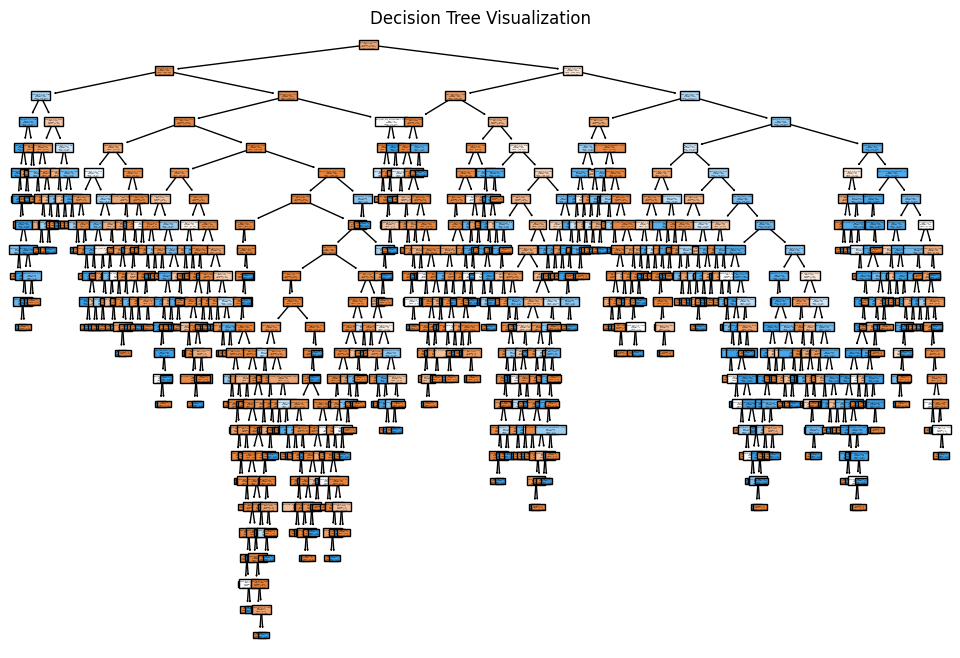

In [59]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Not Spam', 'Spam'])
plt.title("Decision Tree Visualization")
plt.show()

### XGBOOST

In [38]:
from sklearn.model_selection import train_test_split

# Example: X is your features and y is your target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [39]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight (ratio of majority class to minority class)
ratio = sum(y_train == 0) / sum(y_train == 1)

# Create the XGBoost model
model = XGBClassifier(
    scale_pos_weight=ratio,  # Handle class imbalance
    n_estimators=100,        # Number of trees
    max_depth=4,             # Maximum depth of the trees
    learning_rate=0.1,       # Step size shrinkage
    objective='binary:logistic',  # Binary classification
    random_state=42,         # Random state for reproducibility
    eval_metric='logloss'    # Evaluation metric for binary classification
)


In [40]:
ratio

3.3958646616541355

In [41]:
# Train the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [42]:
# Predicting on the test set
y_pred = model.predict(X_test)


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2255
           1       0.83      0.93      0.88       669

    accuracy                           0.94      2924
   macro avg       0.91      0.94      0.92      2924
weighted avg       0.95      0.94      0.94      2924



In [44]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[2130  125]
 [  44  625]]


True Positives (TP) = 625:
These are cases where the model correctly predicted email as spam (positive class).

True Negatives (TN) = 2130:
These are cases where the model correctly predicted email as ham (negative class).

False Positives (FP) = 125:
These are cases where the model incorrectly predicted email as spam (positive class) when the actual email was ham.

False Negatives (FN) = 44:
These are cases where the model incorrectly predicted email as ham (negative class) when the actual email was spam.

In [46]:
# AUC-ROC score
y_pred_proba = model.predict_proba(X_test)[:, 0]
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")

AUC-ROC: 0.01507627958464664


In [45]:
# AUC-ROC score
y_pred_proba = model.predict_proba(X_test)[:, 1]
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")

AUC-ROC: 0.9849237204153534




### Analysis and Recommendations

1. **Overall Performance**:
   - **Random Forest** continues to perform the best overall with the highest precision and F1-scores for both classes.
   - **XGBoost** follows closely, demonstrating strong performance, especially in precision for not spam (class 0).
   - **Decision Tree** shows reasonable performance but lags behind the other models, particularly in precision for spam (class 1).
   - **Logistic Regression** has the lowest metrics overall, particularly in recall for spam (class 1), indicating it misses many spam messages.

2. **Precision**:
   - **XGBoost** exhibits the highest precision for not spam (0.98) and a competitive score for spam (0.83).
   - **Random Forest** has a very high precision for spam (0.94) but lower for not spam compared to XGBoost.
   - **Decision Tree** has a good precision for not spam (0.94) but a lower precision for spam (0.80).

3. **Recall**:
   - **Random Forest** maintains the highest recall for not spam (0.98) and a decent score for spam (0.84).
   - **Decision Tree** has good recall for not spam (0.94) but lower recall for spam (0.79).
   - **Logistic Regression** has the lowest recall for spam (0.69), which indicates it misses many spam emails.

4. **F1-Score**:
   - The **Random Forest** achieves the highest F1-scores overall, indicating a good balance between precision and recall for both classes.
   - **XGBoost** also has high F1-scores, particularly for not spam (0.96).
   - **Decision Tree** has a good F1-score for not spam (0.94) but lower for spam (0.80), while **Logistic Regression** has the lowest F1-scores, especially for spam (0.75).

### Conclusion

Based on the performance metrics:

- **Random Forest** is the best model overall for this email spam classification task, showing strong performance in precision, recall, and F1-scores across both classes.
- **XGBoost** is a close second, especially notable for its high precision for not spam.
- **Decision Tree** performs reasonably well but does not match the other models in terms of spam detection capabilities.
- **Logistic Regression** is the weakest performer and may not be suitable for applications where spam detection is critical.



In [66]:
import pickle

# Save the model
with open('random_forest__baseline_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)